# Una sesión ejemplar de R

Que nos vamos a robar de la página de recursos de R (cran).

In [1]:
x<-rnorm(100)
y<-rnorm(x)

In [4]:
a=0.9181

In [5]:
typeof(a)

[1] "double"

In [ ]:
help.start()

In [10]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
plot(x,y)

ERROR: Error in plot(x, y): objeto 'x' no encontrado


In [8]:
ls()

[1] "a" "x" "y"

In [9]:
rm(x,y)

In [18]:
x<-1:20

In [19]:
w<- 1+sqrt(x)/2

In [22]:
tabla<-data.frame(x=x, y=x+rnorm(x)*w)

In [ ]:
tabla

In [25]:
modelo<-lm(y~x, data=tabla)

In [26]:
summary(modelo)


Call:
lm(formula = y ~ x, data = tabla)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0768 -1.5102  0.1244  1.9661  6.2949 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.8910     1.4308  -0.623    0.541    
x             1.0606     0.1194   8.880 5.38e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.08 on 18 degrees of freedom
Multiple R-squared:  0.8141,	Adjusted R-squared:  0.8038 
F-statistic: 78.85 on 1 and 18 DF,  p-value: 5.378e-08


In [27]:
fm1<-lm(y~x, data=tabla, weight = 1/w^2 )

In [28]:
summary(fm1)


Call:
lm(formula = y ~ x, data = tabla, weights = 1/w^2)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-2.00876 -0.60282  0.08842  0.77587  2.07789 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.0206     0.9892  -1.032    0.316    
x             1.0725     0.1009  10.634 3.44e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.093 on 18 degrees of freedom
Multiple R-squared:  0.8627,	Adjusted R-squared:  0.855 
F-statistic: 113.1 on 1 and 18 DF,  p-value: 3.441e-09


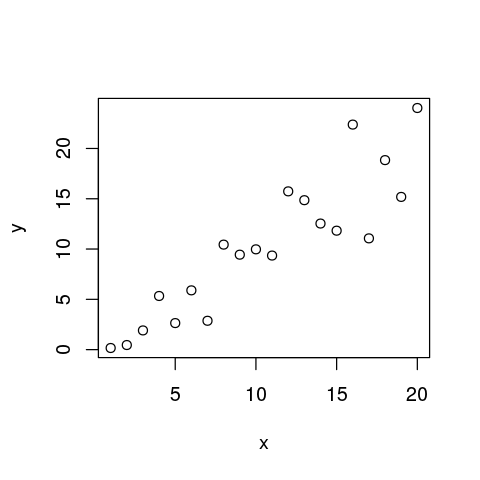

In [31]:
plot(x,y)

In [30]:
attach(tabla)

The following object is masked _by_ .GlobalEnv:

    x



In [34]:
regresionlocal<-lowess(x,y)

In [33]:
help(lowess)

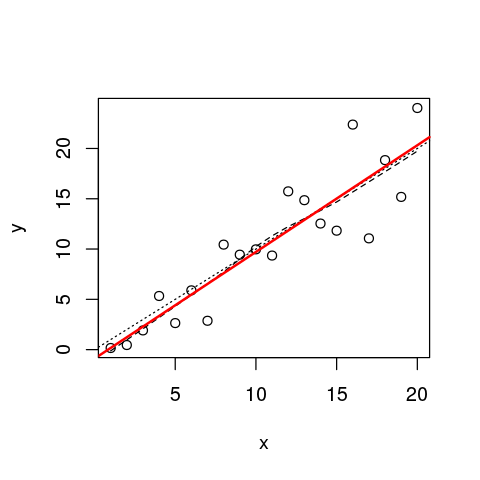

In [45]:
plot(x,y)
lines(x,regresionlocal$y, lty=2)
abline(0,1,lty=3)
#abline(coef(modelo))
abline(coef(modelo),col="red", lw=2)

png 
  3

png 
  2

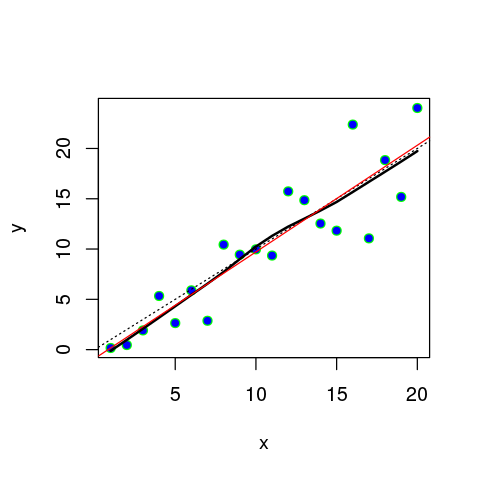

In [48]:
plot(x,y, pch=21, col="green", bg="blue")
lines(x,regresionlocal$y, lw=2)
abline(0,1,lty=3)
abline(coef(modelo),col="red")
dev.copy(png, "graficofeo01.png")
dev.off()

In [ ]:
detach()

A standard regression diagnostic plot to check for
heteroscedasticity. Can you see it?

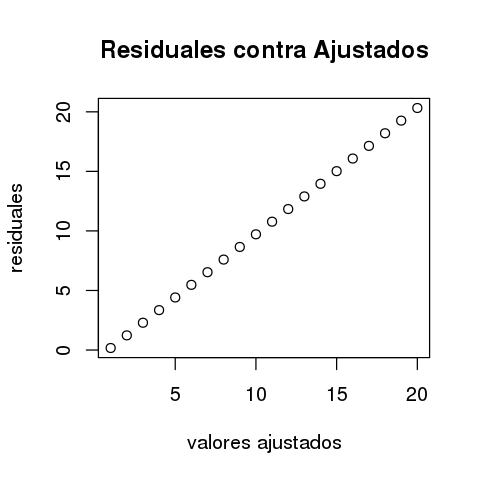

In [49]:
plot(fitted(modelo), xlab = "valores ajustados",
     ylab="residuales", main="Residuales contra Ajustados")

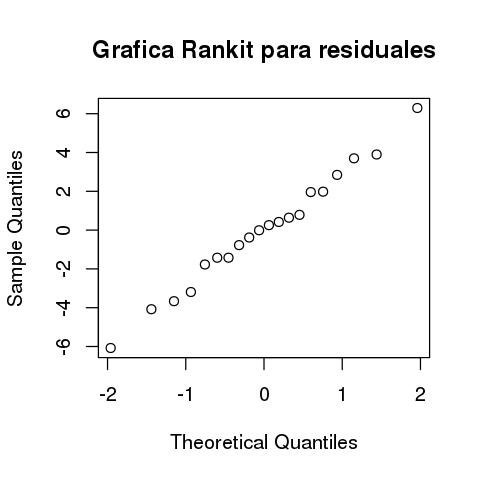

In [50]:
qqnorm(resid(modelo), main="Grafica Rankit para residuales")

In [52]:
rm(modelo,fm1,regresionlocal,tabla,x,w)

Warning message in rm(modelo, fm1, regresionlocal, tabla, x, w):
“objeto 'fm1' no encontrado”Warning message in rm(modelo, fm1, regresionlocal, tabla, x, w):
“objeto 'regresionlocal' no encontrado”Warning message in rm(modelo, fm1, regresionlocal, tabla, x, w):
“objeto 'tabla' no encontrado”Warning message in rm(modelo, fm1, regresionlocal, tabla, x, w):
“objeto 'x' no encontrado”Warning message in rm(modelo, fm1, regresionlocal, tabla, x, w):
“objeto 'w' no encontrado”

In [ ]:
camino<-system.file("data", "morley.tab",package = "datasets")

In [ ]:
camino

In [ ]:
a<-file.show(camino)

In [ ]:
a

In [ ]:
mm<-read.table(camino)

In [ ]:
mm

In [ ]:
mm$Expt<-factor(mm$Expt)
mm$Run<-factor(mm$Run)

In [ ]:
attach(mm)

In [ ]:
plot(Expt,Speed, main="datos de la v. de la luz", 
    xlab="experimento num." , col=172)

In [ ]:
fm<-aov(Speed~Run+Expt, data=mm)

In [ ]:
summary(fm)

Esto son abreviaciones punto tilde punto significa "como estaba antes" y menos significa quita esto.

In [ ]:
fm0<-update(fm, .~.-Run)

In [ ]:
anova(fm0,fm)

In [ ]:
plot(fm0)